In [21]:
from plotnine import *
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
import json
import os
import geopandas as gpd

plt.rcParams['svg.fonttype'] = 'none'

In [22]:
df = pd.read_csv('syriaclean2022.csv')
df

,Syrian refugees - major hosting countries worldwide in 2022,Unnamed: 1
0,Ranking of the largest Syrian refugee-hosting ...,NaN
1,NaN,NaN
2,Turkey,"3,535,898"
3,Lebanon,"814,715"
4,Jordan,"660,892"
5,Germany,"522,575"
6,Iraq,"257,439"
7,Egypt,"145,658"
8,Sweden,"111,199"
9,Sudan,"93,478"


In [23]:
import pandas as pd

# Path to your CSV file
file_path = 'syriaclean2022.csv'

# Read the CSV file, skipping the first two rows which are unnecessary
data = pd.read_csv(file_path, skiprows=2)

# Assuming the first column contains country names and the second contains refugee numbers
# Rename columns for clarity
data.columns = ['Country', 'Refugees']

# Drop any rows where either 'Country' or 'Refugees' is NaN (if any)
data.dropna(subset=['Country', 'Refugees'], inplace=True)

# Convert 'Refugees' column to a numeric type, handling commas as thousands separators
data['Refugees'] = data['Refugees'].str.replace(',', '').astype(float)

# Display the cleaned DataFrame
print(data.head())

#name this new DataFrame



   Country   Refugees
0   Turkey  3535898.0
1  Lebanon   814715.0
2   Jordan   660892.0
3  Germany   522575.0
4     Iraq   257439.0


KeyError: 'Refugees'

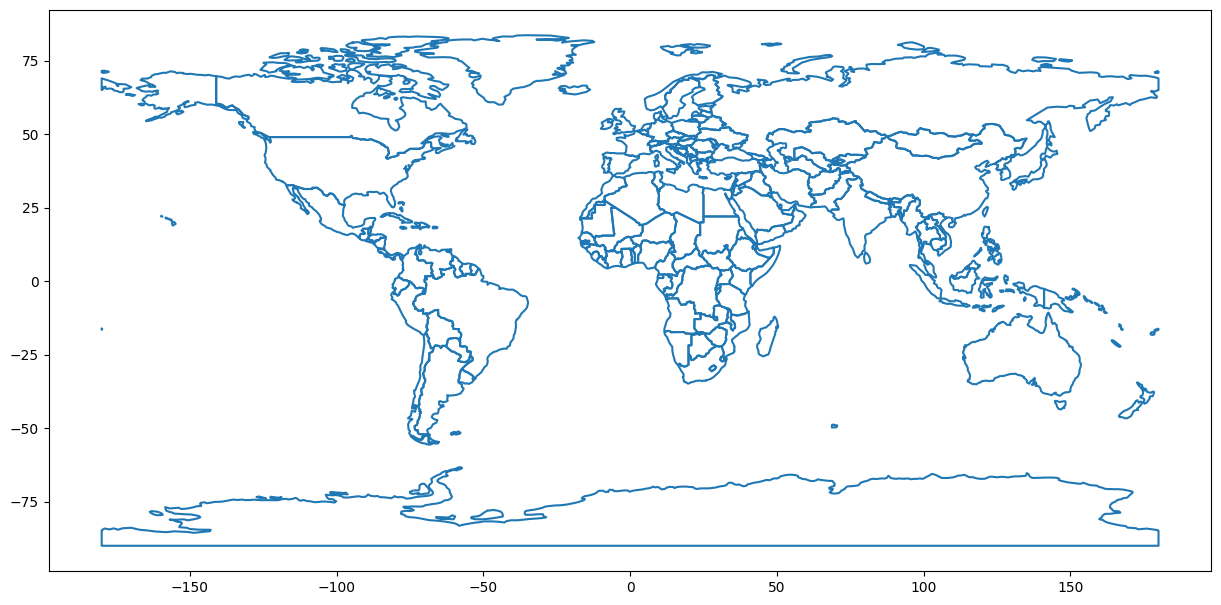

In [25]:

# Check if 'Refugees' column exists in 'data' DataFrame
if 'Refugees' in data.columns:
    merged_data = world.merge(data, left_on='name', right_on='Country')
    merged_data

    # Don't hide regions without data
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    world.boundary.plot(ax=ax)
    world.plot(column='Refugees', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
    plt.title('Refugees by Country')
    plt
else:
    print("The 'Refugees' column does not exist in the 'data' DataFrame.")


In [29]:
print(merged_data)

        pop_est continent         name iso_a3  gdp_md_est  \
0    42813238.0    Africa        Sudan    SDN       30513   
1     5347896.0    Europe       Norway    NOR      403336   
2    67059887.0    Europe       France    FRA     2715518   
3     6855713.0      Asia      Lebanon    LBN       51991   
4    10101694.0      Asia       Jordan    JOR       44502   
5    39309783.0      Asia         Iraq    IRQ      234094   
6    10285453.0    Europe       Sweden    SWE      530883   
7     8877067.0    Europe      Austria    AUT      445075   
8    83132799.0    Europe      Germany    DEU     3861123   
9     6975761.0    Europe     Bulgaria    BGR       68558   
10   10716322.0    Europe       Greece    GRC      209852   
11   83429615.0      Asia       Turkey    TUR      761425   
12    8574832.0    Europe  Switzerland    CHE      703082   
13   11484055.0    Europe      Belgium    BEL      533097   
14   47076781.0    Europe        Spain    ESP     1393490   
15    5818553.0    Europ

In [27]:
import altair as alt
import pandas as pd
import json

# Assuming the cleaned data is stored in cleaned_data as done previously
# Load the GeoJSON file for the world's countries
geojson_path = 'world.geojson'
with open(geojson_path) as f:
    geo_data = json.load(f)

# Create an Altair data object for the GeoJSON data
countries_geojson = alt.InlineData(values=geo_data, format=alt.DataFormat(property='features', type='json'))

# Base map layer
base = alt.Chart(countries_geojson).mark_geoshape(
    fill='lightgray',
    stroke='white'
).properties(
    width=800,
    height=400
).project('equirectangular')

# Refugee data layer
refugee_layer = alt.Chart(countries_geojson).mark_geoshape().encode(
    color=alt.Color('Refugees:Q', scale=alt.Scale(scheme='reds')),
    tooltip=[alt.Tooltip('Country:N'), alt.Tooltip('Refugees:Q')]
).transform_lookup(
    lookup='properties.name',
    from_=alt.LookupData(data, 'Country', ['Refugees'])
).properties(
    title='Number of Syrian Refugees per Country in 2022'
)

# Combine the layers
final_map = base + refugee_layer
final_map


alt.LayerChart(...)